# A6: Time Series Analysis

Contents
- Importing quandl library and connecting api
- importing inside airbnb data and comparing price development 2019 - 2023
- analyzing Consumer Price Index Germany
- Decomposing without smoothing
- Decomposing withg Smoothing
- Dickey Fuller Test and Autocorrelation test
- Differencing Techniquie to make data stationary
- Dickey Fuller Test and Autocorrelation test

## Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'xxxxxxxxxxxxx' # I've disabled my personal key here. You can set up your own account on quandl to access the data with your own key.

In [3]:
# Importing various data for tests

# data = quandl.get('OECD/NAAG_DEU_TOT') # https://data.nasdaq.com/data/OECD/NAAG_DEU_TOT-germany-terms-of-trade
data = quandl.get('RATEINF/CPI_DEU') # consumer price index, GER: https://data.nasdaq.com/data/RATEINF/CPI_DEU-consumer-price-index-germany

In [4]:
data.head(5)

,Value
Date,
1991-01-31,64.0
1991-02-28,64.3
1991-03-31,64.3
1991-04-30,64.5
1991-05-31,64.7


In [5]:
data.shape

(392, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

## Importing Berlin 2023 and 2019 to compare prices

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

In [9]:
#importing csv dataset:
path1 = r'C:\Users\chris\Documents\airbnb_Berlin'
listings_2023 = pd.read_csv(os.path.join(path1,'02 data', 'original data', 'listings.csv'))

In [10]:
#importing csv dataset:
path2 = r'C:\Users\chris\Documents\airbnb_Berlin_2019'
listings_2019 = pd.read_csv(os.path.join(path2,'02 data', 'original data', 'listings.csv'))

In [11]:
listings_2023.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,148,2023-05-25,0.87,1,80,1,First name and Last name: Nicolas Krotz Conta...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.08,1,52,0,03/Z/RA/003410-18


In [12]:
listings_2019.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.89,1,280,0,First name and Last name: Nicolas Krotz Conta...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18


In [13]:
average_prices_by_room_type_2023 = listings_2023.groupby('room_type')['price'].mean()

In [14]:
average_prices_by_room_type_2023.round(1)

room_type
Entire home/apt    133.5
Hotel room         227.8
Private room        74.9
Shared room        102.7
Name: price, dtype: float64

In [15]:
average_prices_by_room_type_2019 = listings_2019.groupby('room_type')['price'].mean()

In [16]:
average_prices_by_room_type_2019.round(1)

room_type
Entire home/apt    122.9
Hotel room         159.5
Private room        72.0
Shared room         47.6
Name: price, dtype: float64

In [17]:
listings_2023['price'].mean().round(1)

115.2

In [18]:
listings_2019['price'].mean().round(1)

103.2

##### So, from 2019 to 2023 average prices of listings rose by 11,6%. Hotel rooms are 43% more expensive and shared rooms doubled in price. >> We will look at the Consumer Price Index, to see how overall prices behaved over time.

## Checking on the Consumer Price Index GER

source: Quandl platform, https://data.nasdaq.com/data/RATEINF/CPI_DEU-consumer-price-index-germany 
data link via API

### 1. viewing the data

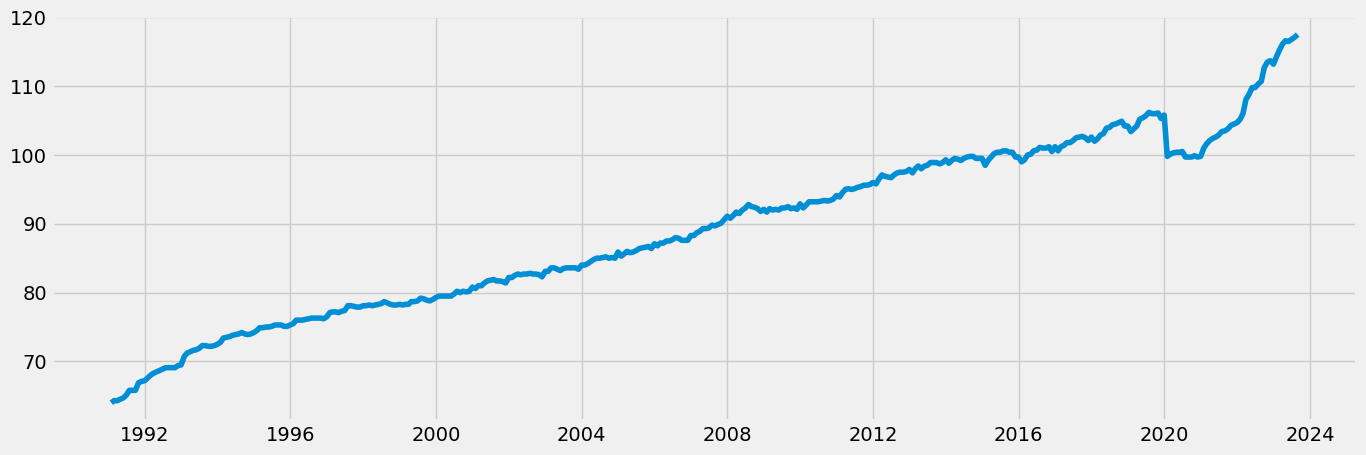

In [19]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

About the data: The CPI is released monthly, so there is no forecasted data. I make a subset, because I only want to look on the most recent years around my own data project, less resent data does not lend further benefit to my analysis.

In [20]:
# Reset index so that you can use the "Date" column as a filter
data_2 = data.reset_index()

In [21]:
data_2.head()

,Date,Value
0,1991-01-31,64.0
1,1991-02-28,64.3
2,1991-03-31,64.3
3,1991-04-30,64.5
4,1991-05-31,64.7


In [22]:
data_2.tail()

,Date,Value
387,2023-04-30,116.6
388,2023-05-31,116.5
389,2023-06-30,116.8
390,2023-07-31,117.1
391,2023-08-31,117.5


In [23]:
# data starting with 2018 is more than enough
data_sub = data_2.loc[data_2['Date'] >= '2018-01-01']

In [24]:
data_sub.shape

(68, 2)

In [25]:
data_sub.head()

,Date,Value
324,2018-01-31,102.0
325,2018-02-28,102.3
326,2018-03-31,102.9
327,2018-04-30,103.1
328,2018-05-31,103.9


In [26]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2018-01-31,102.0
2018-02-28,102.3
2018-03-31,102.9
2018-04-30,103.1
2018-05-31,103.9


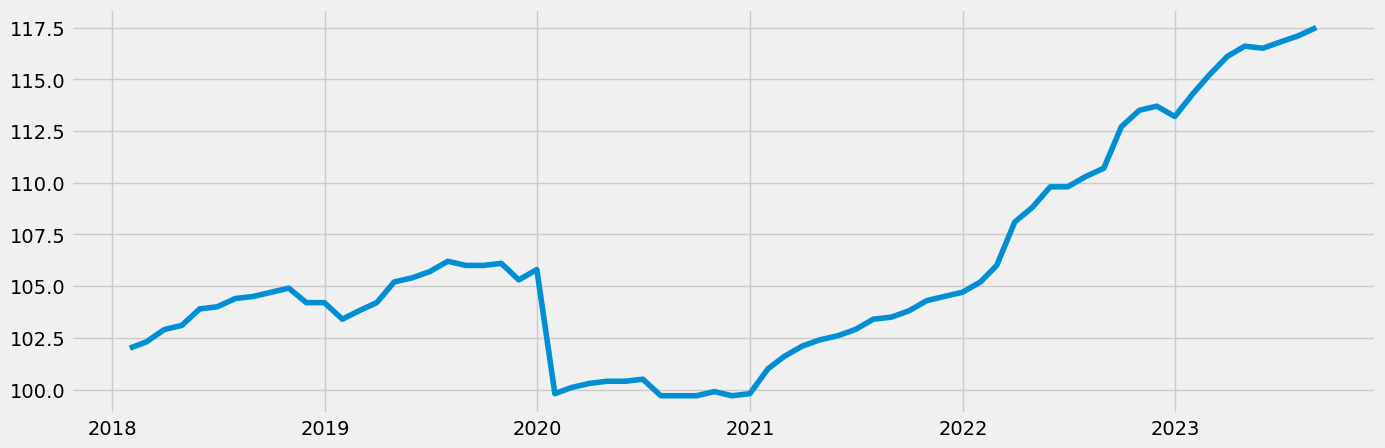

In [27]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [28]:
# Check for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [29]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

# No dups!

16

In [30]:
data_sub.head()

,Value
datetime,
2018-01-31,102.0
2018-02-28,102.3
2018-03-31,102.9
2018-04-30,103.1
2018-05-31,103.9


### 3. Time-series analysis: decomposition

In [31]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [32]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

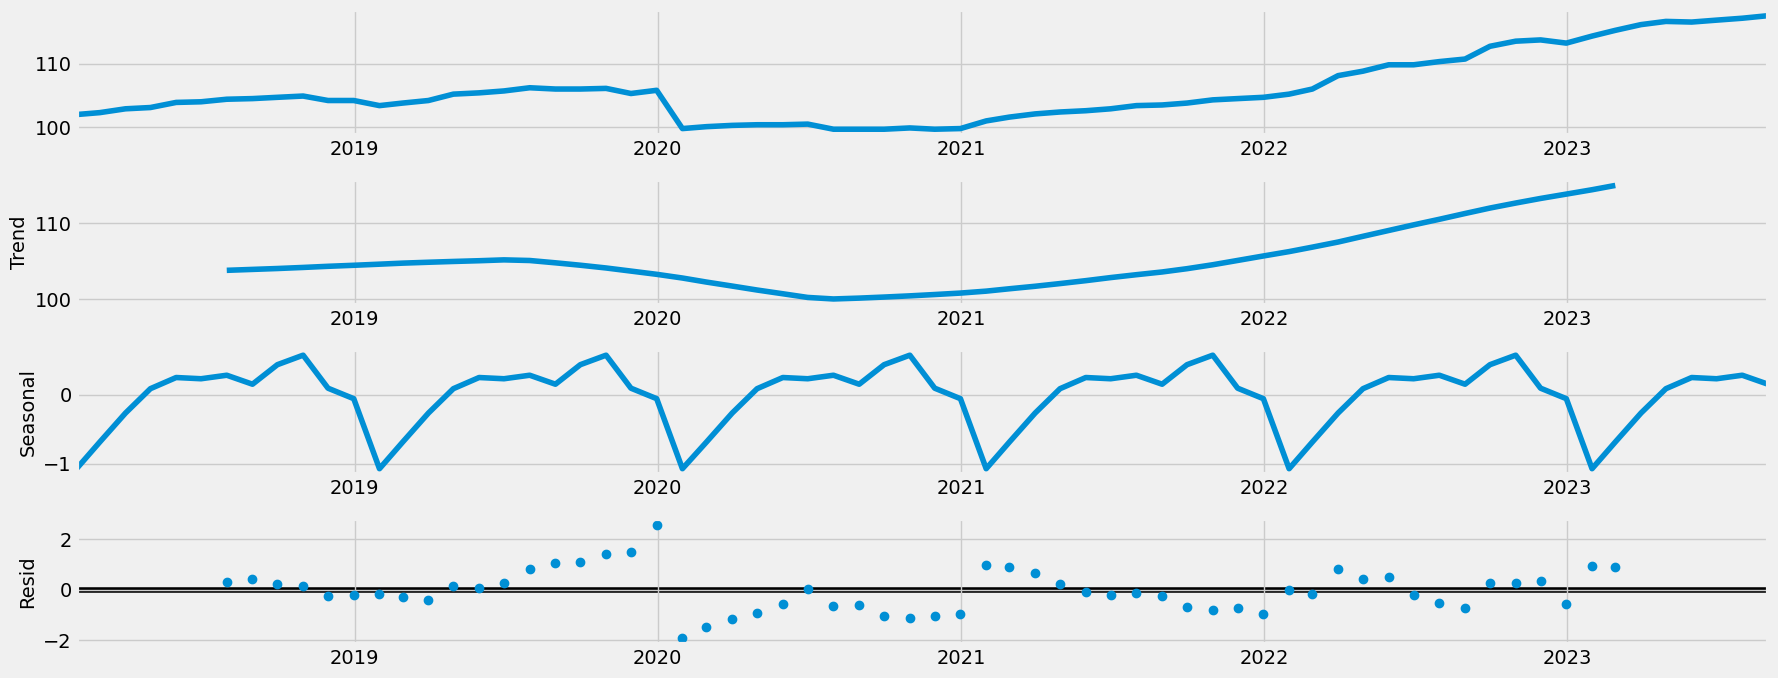

In [33]:
# Plot the separate components

decomposition.plot()
plt.show()

Interpretation:
- Trend: the general trend was rather steady until 2020, where there is a sharp drop, followed by a plateau and towards 2022 a slight rise and towards 2023 a very strong rise. With 2022 the level before 2020 was crossed.
- Seasonality: There is an underlying seasonality, answering the general fatigue of the markets when consumers don't buy much. A littel dip when summer holiday break hits and then the stressful run towards year's end revenue goals, inlcuding last dicounts approaching events like Black Friday and Christmas.
- Noise: There is some extra noise, but not much. No smoothing required.

### Intermission: Checking the decomposition with smoothed values

In [34]:
# Copy data frame
data_sub_smooth = data_sub.copy()

In [35]:
# smoothing with moving average, 3-month-cycles:
data_sub_smooth['SMA_3'] = data_sub_smooth['Value'].rolling(window=3).mean()

In [36]:
# Check for missing values
data_sub_smooth.isnull().sum()

Value    0
SMA_3    2
dtype: int64

In [37]:
data_sub_smooth.head()

,Value,SMA_3
datetime,,
2018-01-31,102.0,NaN
2018-02-28,102.3,NaN
2018-03-31,102.9,102.400000
2018-04-30,103.1,102.766667
2018-05-31,103.9,103.300000


In [38]:
subset_missing_values = data_sub_smooth[data_sub_smooth['SMA_3'].isnull()]
print(subset_missing_values) 

            Value  SMA_3
datetime                
2018-01-31  102.0    NaN
2018-02-28  102.3    NaN


In [39]:
# replacing nan with original values, as there wasn't any noise
original_values = [102.0, 102.3]

In [40]:
# Replace nan values in "SMA_3"-column
data_sub_smooth.loc[data_sub_smooth['SMA_3'].isnull(), 'SMA_3'] = original_values

In [41]:
data_sub_smooth.head()

,Value,SMA_3
datetime,,
2018-01-31,102.0,102.000000
2018-02-28,102.3,102.300000
2018-03-31,102.9,102.400000
2018-04-30,103.1,102.766667
2018-05-31,103.9,103.300000


In [42]:
# Drop "Value"-column
data_sub_smooth.drop(columns='Value', inplace=True)

In [43]:
data_sub_smooth.head()

,SMA_3
datetime,
2018-01-31,102.000000
2018-02-28,102.300000
2018-03-31,102.400000
2018-04-30,102.766667
2018-05-31,103.300000


In [44]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub_smooth, model='additive')

In [45]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

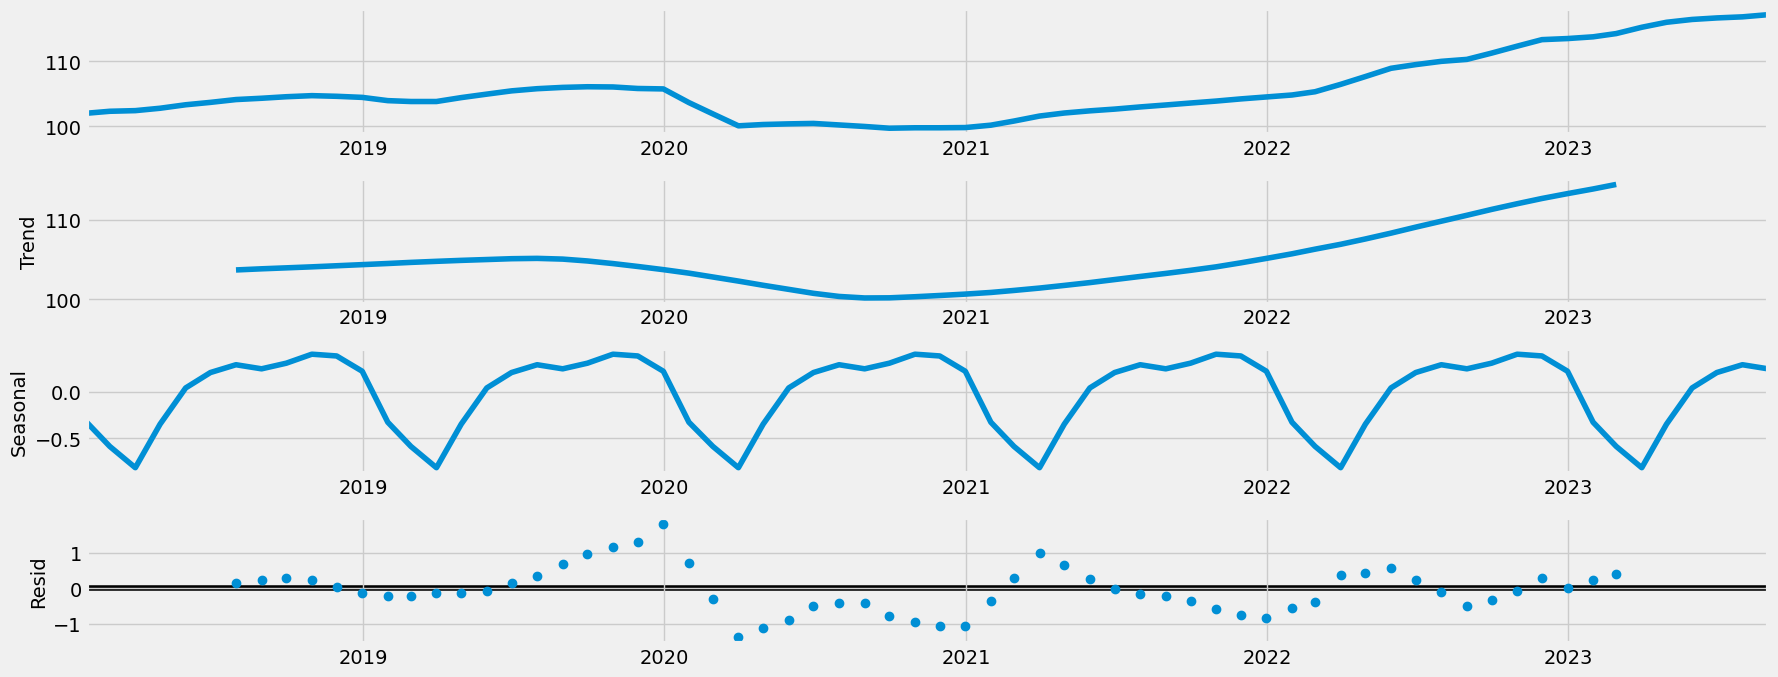

In [46]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Ok, the decomposition looks the same with smoothing. I guess it's not too much noise then and continue with testing.

### 4. Testing for stationarity

In [47]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.876783
p-value                         0.992780
Number of Lags Used             0.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


##### Interpretation of Dickey Fuller No 1:
- The test statistic is higher than the critical values and close to zero. 
- the p-value is with 0,99 is rather high.
- the critical values are all smaller than the test statictic.

Those results indicate, that the data is not stationary. We need a differenciating transformation to ensure stationarity for data.

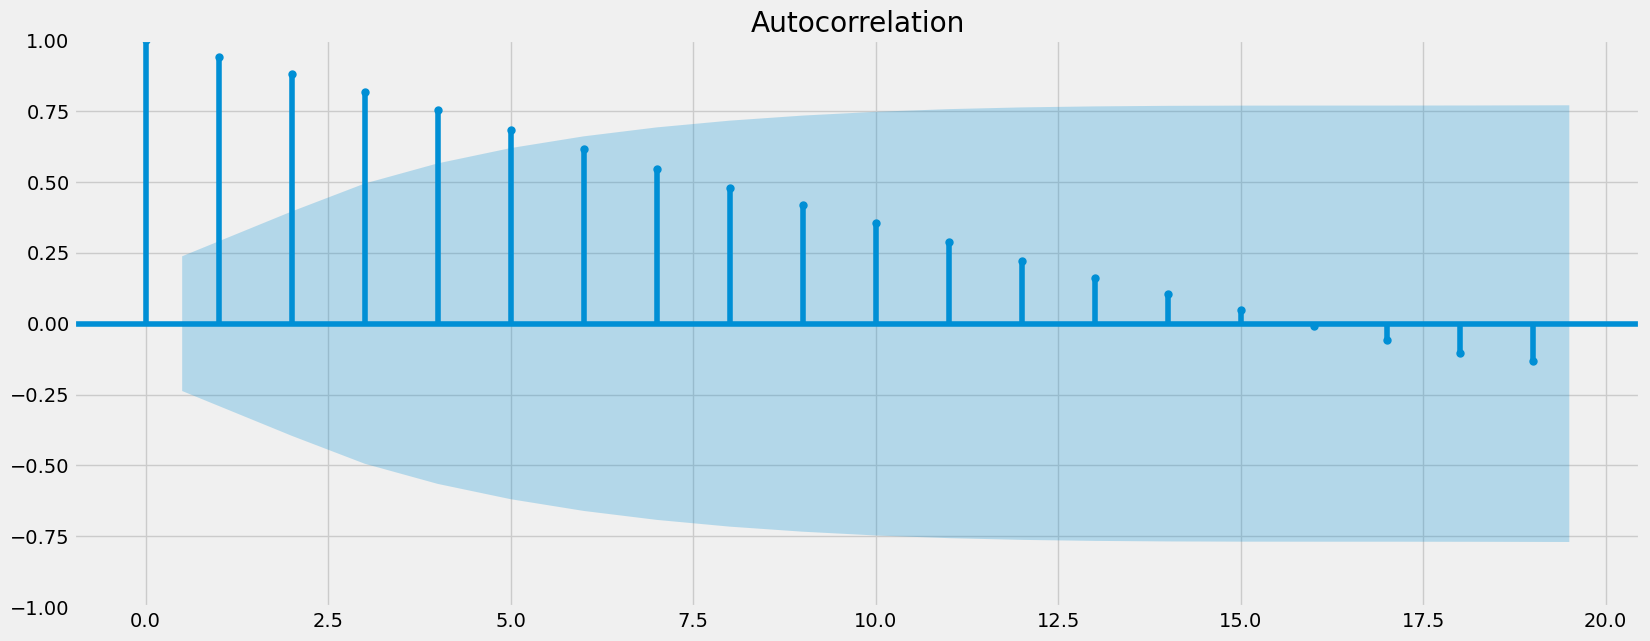

In [48]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

Interpretation of the autocorrelation chart.
- When lines go above the blue edge of the confidence interval, this means there are lags that are significantly correlated with each other > there are 6 lags significantly correlated with each other.
- that supports the Dickey Fuller test - the data is non-staionary.

### 5. Stationarizing the Consumer Price Index Data

In [49]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [50]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [51]:
data_diff.head()

,Value
datetime,
2018-02-28,0.3
2018-03-31,0.6
2018-04-30,0.2
2018-05-31,0.8
2018-06-30,0.1


In [52]:
data_diff.columns

Index(['Value'], dtype='object')

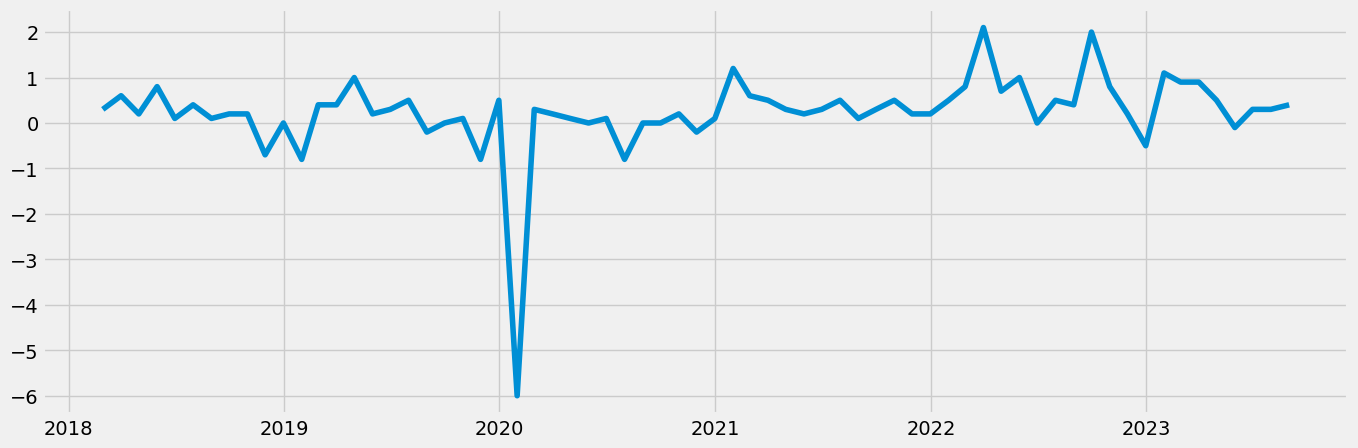

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [54]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.581734e+00
p-value                        2.670792e-11
Number of Lags Used            0.000000e+00
Number of Observations Used    6.600000e+01
Critical Value (1%)           -3.533560e+00
Critical Value (5%)           -2.906444e+00
Critical Value (10%)          -2.590724e+00
dtype: float64


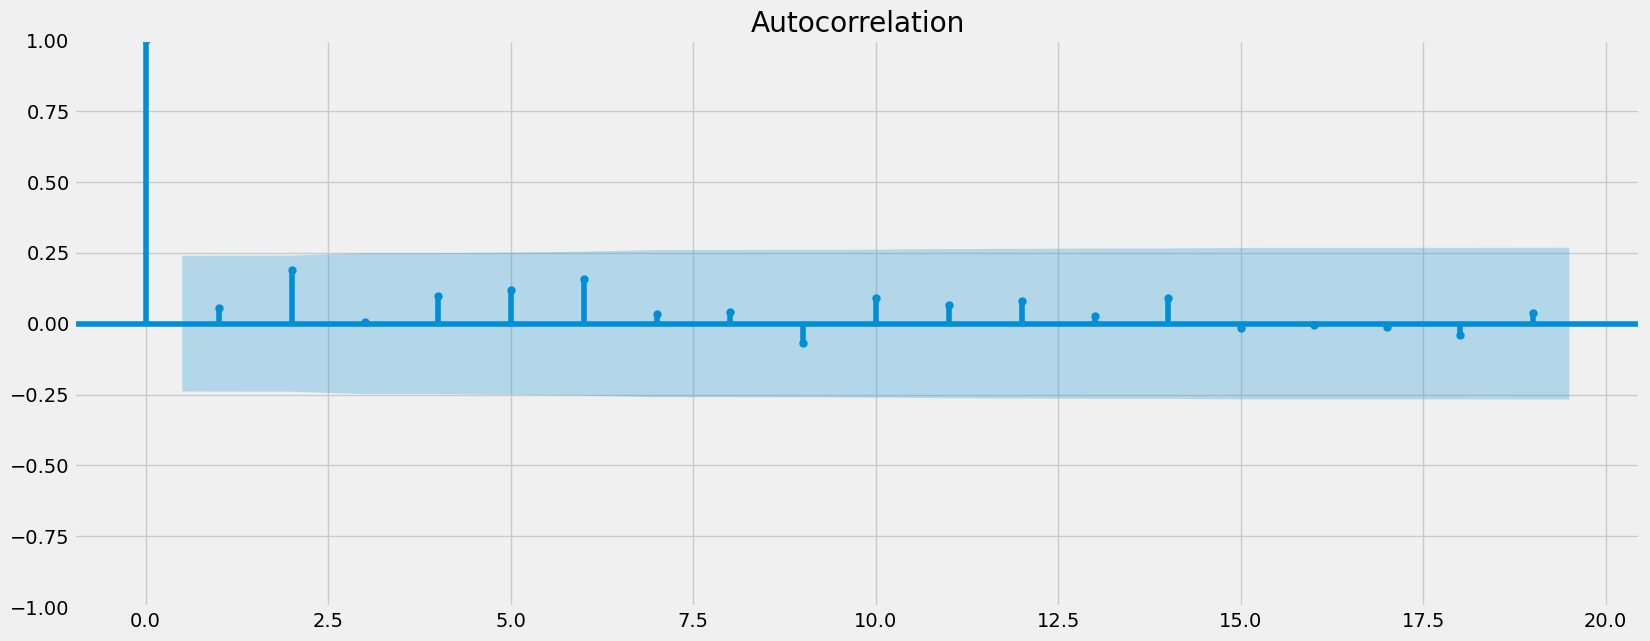

In [55]:
plot_acf(data_diff)
plt.show()

#### Dickey Fuller No 2:
- test statistic < than all critical values
- p-values very small.
That means: The time series is now most likely stationary. We can reject the Null-Hypothesis.

#### Autocorrelation No 2:
- there is only 1 lag beyond. Rule of thumb: We need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differencing to be necessary. 

### The data is now stationary and can be used for forecasting (not part of my analysis).